## PHD- PONNANNA 

#### Load the libraries 

In [269]:

import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score


from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import confusion_matrix



from sklearn.model_selection import GridSearchCV

#import graphviz
#!conda install --yes python-graphviz
#!conda install --yes graphviz

import matplotlib.pyplot as plt


#### Library to ignore warning 

In [270]:
import warnings
warnings.filterwarnings('ignore')

### Problem Statement

"Predicting the “Fraud in auto insurance claims”  &  Pattern extraction
Problem Description

A major general insurance company has a business problem with a significant number of claims being reported are fraudulent in nature and it is leading to leakages.  So, the Insurer decided to predict the fraudulent ones before even processing the claims to allocate costs appropriately, to keep the thorough investigation process in place and to design a proper action plan for the claims, etc.

Insurance fraud refers to any claim with the intent to obtain an improper payment from an insurer.  Motor and health insurance are the two prominent segments that have seen a spurt in fraud. Frauds can be classified from the source and/or nature point of view. 

Sources can be policyholder, intermediary and/or internal with the latter two being more critical from the internal control framework point of view. Frauds can be classified into nature wise, for example, application, inflation, identity, fabrication, staged/contrived/induced accidents, etc.

Fraud affects the lives of innocent people as well as the insurance industry and thus it may be of interest for the health of the Insurance Industry and Society. In fact, Insurers report certain classified cases to Regulator and Law enforcement agencies like Police, Crime Bureaus and others as mandated by the Regulators/Government and required by Law. With the advent of organized gangs and/or collusion, the problem has become more complex and sophisticated and the frauds have been difficult to detect and to prove if detected.

The framework of prediction of fraud and pattern extraction will be useful for the insurance companies, regulatory body, intelligence department, etc.

Prediction at the time of processing claims will reduce costs and minimize losses.
The intelligence arising out of ever-improving prediction algorithms will help to retrofit in terms of improvement of the underwriting process, the exercise of a good selection of policyholders based on identified profile attributes, strengthening of internal risk management mechanisms and finally, clear guidance and communication to employees and other stakeholders involved.
At the Industry level, the shared aggregate information helps build appropriate intelligence and resilience while paving the way for collective effort for prevention as well as minimizing losses and to match the efforts of perpetrators. 

At the Regulator and Law enforcement level, the intelligence arising out of prediction will help revamp the Regulations/Laws and plan not only enforcement but Industry based initiatives/systems for resilience and to share information for the consumption of the Industry and the Society.
Prediction at the time of processing claims will reduce costs and minimize losses for the insurance company.  Hence, the prediction of fraud plays a very important role in auto insurance claims. The company wants to understand the hidden patterns in the data which lead to the construction of the investigation process as well as claim settlement decision.

Beyond building a model to predict fraud you will have to identify the patterns for fraud which will help in-turn to the company to take action accordingly to initiate the investigations on claim classes to identify if fraud exists and also to handle the fraudulent cases while settling the claims.

You are expected to create an analytical and modeling framework to predict the fraud in auto insurance claims based on the demographic, policy, claim, and vehicle-related features provided in the datasets and also generate the top 20 patterns for fraud on target attribute using the decision tree algorithms only, while answering other questions too cited below.

Objectives
In this hackathon, you are expected 
1. to do exploratory Data Analysis using visualizations
2. to report the results/observations from learning curves 
3. to build the analytical framework to predict if a claim is fraudulent or not
4. to extract the top 20 patterns for fraudulent claim

## Data 

In [271]:
!pip install sklearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


#### Reading Train data

In [272]:
Train = pd.read_csv("Train.csv", na_values=[" ",".","NA","?","-",""])
Train_Claim = pd.read_csv("Train_Claim.csv", na_values=[" ","MISSEDDATA","NA","?","-5","MISSINGVALUE",""])
Train_Demographics = pd.read_csv("Train_Demographics.csv",na_values=[" ",".","NA","-",""] )
Train_Policy = pd.read_csv("Train_Policy.csv",na_values=[" ",".","NA","MISSINGVAL","-1",""])
Train_Vehicle = pd.read_csv("Train_Vehicle.csv",na_values=[" ",".","NA","???","-1",""])

#### Reading Test data

In [273]:
Test = pd.read_csv("Test.csv", na_values=[" ",".","NA","?","-",""])
Test_Claim = pd.read_csv("Test_Claim.csv", na_values=[" ","MISSEDDATA","NA","?","-5","MISSINGVALUE",""])
Test_Demographics = pd.read_csv("Test_Demographics.csv",na_values=[" ",".","NA","-",""] )
Test_Policy = pd.read_csv("Test_Policy.csv",na_values=[" ",".","NA","MISSINGVAL","-1",""])
Test_Vehicle = pd.read_csv("Test_Vehicle.csv",na_values=[" ",".","NA","???","-1",""])

Conversion of Catrgorical column to object type 

In [274]:
Train_Demographics['InsuredZipCode']=Train_Demographics['InsuredZipCode'].astype('object')
Test_Demographics['InsuredZipCode']=Test_Demographics['InsuredZipCode'].astype('object')
Train_Policy['InsurancePolicyNumber']=Train_Policy['InsurancePolicyNumber'].astype('object')
Test_Policy['InsurancePolicyNumber']=Test_Policy['InsurancePolicyNumber'].astype('object')
Train_Claim['NumberOfVehicles']=Train_Claim['NumberOfVehicles'].astype('object')
Train_Claim['BodilyInjuries']=Train_Claim['BodilyInjuries'].astype('object')
Train_Claim['Witnesses']=Train_Claim['Witnesses'].astype('object')
Test_Claim['NumberOfVehicles']=Test_Claim['NumberOfVehicles'].astype('object')
Test_Claim['BodilyInjuries']=Test_Claim['BodilyInjuries'].astype('object')
Test_Claim['Witnesses']=Test_Claim['Witnesses'].astype('object')

since after inspection vehicle attribute and vehicle attribute details have soem common relation - applying pivot

In [275]:
Train_Vehicle.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').head(5)

VehicleAttribute,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,,
Cust10000,Vehicle26917,Audi,A5,2008
Cust10001,Vehicle15893,Audi,A5,2006
Cust10002,Vehicle5152,Volkswagen,Jetta,1999
Cust10003,Vehicle37363,Volkswagen,Jetta,2003
Cust10004,Vehicle28633,Toyota,CRV,2010


In [276]:
Test_Vehicle.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').head(5)

VehicleAttribute,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,,
Cust10008,Vehicle34362,Volkswagen,Passat,1995
Cust10010,Vehicle17046,Nissan,Ultima,2006
Cust10015,Vehicle11038,Suburu,Impreza,2010
Cust10020,Vehicle37114,Accura,TL,2009
Cust1003,Vehicle16771,Dodge,RAM,2007


In [277]:
Train_Vehicle=Train_Vehicle.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').reset_index()
Test_Vehicle=Test_Vehicle.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').reset_index()

Changing Y and N to 1 and 0's 

In [278]:
Train['ReportedFraud']=Train['ReportedFraud'].apply(lambda x: 1 if x=='Y' else 0)

### Merging Train dataset

In [279]:
Merged_Train1 = pd.merge(Train,Train_Claim, how = "inner", on='CustomerID')
Merged_Train2 = pd.merge(Merged_Train1,Train_Demographics, how ="inner", on='CustomerID', right_index=True,left_index=True)
Merged_Train3 = pd.merge(Merged_Train2,Train_Policy, how ="inner", on='CustomerID', right_index=True,left_index=True)
Merged_Train4 = pd.merge(Merged_Train3,Train_Vehicle, how ="inner", on='CustomerID', right_index=True,left_index=True)
data=Merged_Train4




### Merging Test dataset

In [280]:
Merged_Test1 = pd.merge(Test,Test_Claim, how = "inner", on='CustomerID',right_index=True,left_index=True)
Merged_Test2 = pd.merge(Merged_Test1,Test_Demographics, how ="inner", on='CustomerID', right_index=True,left_index=True)
Merged_Test3 = pd.merge(Merged_Test2,Test_Policy, how ="inner", on='CustomerID', right_index=True,left_index=True)
Merged_Test4 = pd.merge(Merged_Test3,Test_Vehicle, how ="inner", on='CustomerID', right_index=True,left_index=True)
data_test=Merged_Test4

### Understanding the Data

In [281]:
data.shape

(28836, 42)

In [282]:
data_test.shape

(8912, 41)

### Column names 

In [283]:
data.columns

Index(['CustomerID', 'ReportedFraud', 'DateOfIncident', 'TypeOfIncident',
       'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge',
       'InsuredZipCode', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'CapitalGains', 'CapitalLoss',
       'Country', 'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object')

In [284]:
data_test.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object')

In [285]:
data.head()

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust20065,0,2015-01-09,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,...,State3,250/500,1000,1406.91,0,husband,Vehicle26917,Audi,A5,2008
1,Cust37589,0,2015-02-20,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,...,State1,250/500,2000,1415.74,6000000,unmarried,Vehicle15893,Audi,A5,2006
2,Cust24312,0,2015-01-14,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,...,State1,500/1000,1000,1583.91,6000000,unmarried,Vehicle5152,Volkswagen,Jetta,1999
3,Cust5493,1,2015-01-07,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,...,State3,250/500,1000,1351.10,0,unmarried,Vehicle37363,Volkswagen,Jetta,2003
4,Cust7704,1,2015-02-26,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,...,State2,250/500,1000,1333.35,0,husband,Vehicle28633,Toyota,CRV,2010


In [286]:
data_test.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4.0,...,State3,100/300,2000,1413.14,5000000,own-child,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16.0,...,State1,100/300,1000,1137.03,0,unmarried,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20.0,...,State2,100/300,2000,1131.40,0,other-relative,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,2015-01-03,Vehicle Theft,NaN,Trivial Damage,None,State7,City5,Location 1449,10.0,...,State3,500/1000,500,1374.22,0,other-relative,Vehicle37114,Accura,TL,2009
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7.0,...,State2,500/1000,2000,1475.73,0,own-child,Vehicle16771,Dodge,RAM,2007


Checking for insignificant columns 

In [287]:
def insignificantCols(dataset):
    insignificantCols=[]
    size=dataset.shape[0]
    for i in dataset.columns:
        x=dataset[i].nunique()
        if (x==size)|(x==1):
            insignificantCols.append(i)
    return insignificantCols

In [288]:
insigCol=insignificantCols(data)
insigCol

['CustomerID', 'Country', 'InsurancePolicyNumber', 'VehicleID']

#### Dropping insignificant columns 

In [289]:
data.drop(['CustomerID', 'Country', 'InsurancePolicyNumber', 'VehicleID'],axis=1,inplace=True)

In [290]:
data_test.drop(['CustomerID', 'Country', 'InsurancePolicyNumber', 'VehicleID'],axis=1,inplace=True)

#### Data Type

In [291]:
type(data)

pandas.core.frame.DataFrame

In [292]:
type(data_test)


pandas.core.frame.DataFrame

#### Display data type of each variable

In [293]:
data.dtypes

ReportedFraud                   int64
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles               object
PropertyDamage                 object
BodilyInjuries                 object
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim            float64
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                 object
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

#### Summary of data

In [294]:
data.describe(include='all')

,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleModel,VehicleYOM
count,28836.000000,28836,28836,23674,28836,28836,28836,28836,28836,28805.000000,...,28836,28836,28836,28836.000000,28695.000000,2.883600e+04,28836,28786,28836,28836
unique,NaN,72,4,3,4,5,7,7,1000,NaN,...,6779,3,9,NaN,NaN,NaN,6,14,39,21
top,NaN,2015-01-10,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1341,NaN,...,1998-11-11,State3,250/500,NaN,NaN,NaN,own-child,Saab,RAM,2007
freq,NaN,661,11966,8561,10400,8324,7886,4486,73,NaN,...,38,10146,8260,NaN,NaN,NaN,5242,2415,1344,1730
mean,0.269975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.764069,...,NaN,NaN,NaN,1114.282529,1261.702646,9.836680e+05,NaN,NaN,NaN,NaN
std,0.443954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.148869,...,NaN,NaN,NaN,546.632816,205.385158,1.969282e+06,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,500.000000,436.280000,-1.000000e+06,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,...,NaN,NaN,NaN,622.000000,1124.425000,0.000000e+00,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,...,NaN,NaN,NaN,1000.000000,1266.440000,0.000000e+00,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,...,NaN,NaN,NaN,1627.000000,1397.200000,4.859610e+05,NaN,NaN,NaN,NaN


In [295]:
data_test.describe(include='all')

,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,...,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleMake,VehicleModel,VehicleYOM
count,8912,8912,7149,8912,8912,8912,8912,8912,8905.000000,8912.0,...,8912,8912,8912,8912.000000,8865.000000,8.912000e+03,8912,8904,8912,8912
unique,67,4,3,4,5,7,7,996,NaN,4.0,...,4533,3,9,NaN,NaN,NaN,6,14,38,21
top,2015-02-17,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1341,NaN,1.0,...,1992-04-14,State3,100/300,NaN,NaN,NaN,own-child,Suburu,Wrangler,2010
freq,211,3594,2602,3378,2623,2489,1405,29,NaN,5099.0,...,15,3132,2561,NaN,NaN,NaN,1643,743,507,544
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.785963,NaN,...,NaN,NaN,NaN,1123.580790,1260.235059,9.318594e+05,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.157104,NaN,...,NaN,NaN,NaN,553.139684,205.534081,1.919603e+06,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,500.000000,433.330000,-8.836920e+05,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,...,NaN,NaN,NaN,622.000000,1119.460000,0.000000e+00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,...,NaN,NaN,NaN,1000.000000,1265.840000,0.000000e+00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,...,NaN,NaN,NaN,1691.250000,1399.240000,2.836810e+05,NaN,NaN,NaN,NaN


#### Dropping  columns

In [296]:
data.drop(['InsuredGender','InsuredZipCode','IncidentState','InsuredHobbies','Policy_CombinedSingleLimit','UmbrellaLimit','InsuredRelationship','TypeOfCollission','AmountOfInjuryClaim','AmountOfPropertyClaim','AmountOfVehicleDamage','IncidentAddress'],axis=1,inplace=True)

In [297]:
data_test.drop(['InsuredGender','InsuredZipCode','IncidentState','InsuredHobbies','Policy_CombinedSingleLimit','UmbrellaLimit','InsuredRelationship','TypeOfCollission','AmountOfInjuryClaim','AmountOfPropertyClaim','AmountOfVehicleDamage','IncidentAddress'],axis=1,inplace=True)

In [298]:
data.shape


(28836, 26)

In [299]:
data_test.shape

(8912, 25)

#### Missing Data Analysis

In [300]:
data.isnull().sum()

ReportedFraud                0
DateOfIncident               0
TypeOfIncident               0
SeverityOfIncident           0
AuthoritiesContacted         0
IncidentCity                 0
IncidentTime                31
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                   46
PoliceReport              9805
AmountOfTotalClaim          50
InsuredAge                   0
InsuredEducationLevel        0
InsuredOccupation            0
CapitalGains                 0
CapitalLoss                  0
CustomerLoyaltyPeriod        0
DateOfPolicyCoverage         0
InsurancePolicyState         0
Policy_Deductible            0
PolicyAnnualPremium        141
VehicleMake                 50
VehicleModel                 0
VehicleYOM                   0
dtype: int64

In [301]:
data_test.isnull().sum()

DateOfIncident              0
TypeOfIncident              0
SeverityOfIncident          0
AuthoritiesContacted        0
IncidentCity                0
IncidentTime                7
NumberOfVehicles            0
PropertyDamage           3199
BodilyInjuries              0
Witnesses                  12
PoliceReport             3014
AmountOfTotalClaim          8
InsuredAge                  0
InsuredEducationLevel       0
InsuredOccupation           0
CapitalGains                0
CapitalLoss                 0
CustomerLoyaltyPeriod       0
DateOfPolicyCoverage        0
InsurancePolicyState        0
Policy_Deductible           0
PolicyAnnualPremium        47
VehicleMake                 8
VehicleModel                0
VehicleYOM                  0
dtype: int64

In [302]:
print (data.shape)

(28836, 26)


In [303]:
print(data_test.shape)

(8912, 25)


# Feature engineering  

### Extracting month and day

Extracting month and day from Date of Incident and policy coverage 

In [304]:
data['Incident_month'] = pd.DatetimeIndex(data['DateOfIncident']).month
data['Incident_day'] = pd.DatetimeIndex(data['DateOfIncident']).day
data['Policy_month'] = pd.DatetimeIndex(data['DateOfPolicyCoverage']).month  ## Month of Date policy coverage

Repeating for test data

In [305]:
data_test['Incident_month'] = pd.DatetimeIndex(data_test['DateOfIncident']).month
data_test['Incident_day'] = pd.DatetimeIndex(data_test['DateOfIncident']).day
data_test['Policy_month'] = pd.DatetimeIndex(data_test['DateOfPolicyCoverage']).month  ## Month of Date policy coverage

### Combining gain and loss columns to get one column representing loss or gain

Train

In [306]:
data['Total_gain_loss'] = data['CapitalGains']+data['CapitalLoss']
data['nor_Total_gain_loss'] = (data['Total_gain_loss'] - data['Total_gain_loss'].min()) / (data['Total_gain_loss'].max() - data['Total_gain_loss'].min())

Test

In [307]:
data_test['Total_gain_loss'] = data_test['CapitalGains']+data_test['CapitalLoss']
data_test['nor_Total_gain_loss'] = (data_test['Total_gain_loss'] - data_test['Total_gain_loss'].min()) / (data_test['Total_gain_loss'].max() - data_test['Total_gain_loss'].min())

Normalization of Amount of total claim - The other amount columns are dropped as all of them added together forms Amount of Claim

Train

In [308]:
data['nor_Total_amount'] = (data['AmountOfTotalClaim'] - data['AmountOfTotalClaim'].min()) / (data['AmountOfTotalClaim'].max() - data['AmountOfTotalClaim'].min())

Test

In [309]:
data_test['nor_Total_amount'] = (data_test['AmountOfTotalClaim'] - data_test['AmountOfTotalClaim'].min()) / (data_test['AmountOfTotalClaim'].max() - data_test['AmountOfTotalClaim'].min())

Dropping columns which are feature engineered

Train

In [310]:


data.drop(["DateOfPolicyCoverage"], axis = 1, inplace = True)
data.drop(["DateOfIncident"], axis = 1, inplace = True)
data.drop(["CapitalGains"], axis = 1, inplace = True)
data.drop(["CapitalLoss"], axis = 1, inplace = True)
data.drop(["Total_gain_loss"], axis = 1, inplace = True)
data.drop(['AmountOfTotalClaim'], axis = 1, inplace = True)


Test

In [311]:
data_test.drop(["DateOfPolicyCoverage"], axis = 1, inplace = True)
data_test.drop(["DateOfIncident"], axis = 1, inplace = True)
data_test.drop(["CapitalGains"], axis = 1, inplace = True)
data_test.drop(["CapitalLoss"], axis = 1, inplace = True)
data_test.drop(["Total_gain_loss"], axis = 1, inplace = True)
data_test.drop(['AmountOfTotalClaim'], axis = 1, inplace = True)

Conversion into dataframe

In [312]:
df_data=pd.DataFrame(data)

In [313]:
df_data_test=pd.DataFrame(data_test)

Checking for shape

In [314]:
df_data.shape

(28836, 26)

In [315]:
df_data_test.shape

(8912, 25)

# DATA IMPUTATION 

Creating categorical and numerical dataframe and imputing numerical with mean and categorical with mode and combining both

Categorical

In [316]:
data_Cat =df_data[[ 'AuthoritiesContacted','InsuredEducationLevel','InsuredOccupation','InsurancePolicyState','TypeOfIncident','SeverityOfIncident','IncidentCity','Incident_day','NumberOfVehicles','PropertyDamage','BodilyInjuries','Witnesses','PoliceReport','Incident_month','Policy_month','ReportedFraud','VehicleMake','VehicleModel']]
data_test_Cat =df_data_test[[ 'AuthoritiesContacted','InsuredEducationLevel','InsuredOccupation','InsurancePolicyState','TypeOfIncident','SeverityOfIncident','IncidentCity','Incident_day','NumberOfVehicles','PropertyDamage','BodilyInjuries','Witnesses','PoliceReport','Incident_month','Policy_month','VehicleMake','VehicleModel']]

Numerical

In [317]:
data_Num = df_data[['InsuredAge','nor_Total_gain_loss','CustomerLoyaltyPeriod','IncidentTime','nor_Total_amount','Policy_Deductible','PolicyAnnualPremium','VehicleYOM']]
data_test_Num = df_data_test[['InsuredAge','nor_Total_gain_loss','CustomerLoyaltyPeriod','IncidentTime','nor_Total_amount','Policy_Deductible','PolicyAnnualPremium','VehicleYOM']]

Imputing  - TRAIN DATA  and combining

In [318]:
data_Cat = data_Cat.fillna(data_Cat.mode().iloc[0])
data_Num = data_Num.fillna(data_Num.mean())
data_comb = pd.concat([data_Cat, data_Num], axis = 1)

Imputing -TEST DATA and combining

In [319]:
data_test_Cat = data_test_Cat.fillna(data_test_Cat.mode().iloc[0])
data_test_Num = data_test_Num.fillna(data_test_Num.mean())
data_test_comb = pd.concat([data_test_Cat, data_test_Num], axis = 1)

In [320]:
df_data_comb=pd.DataFrame(data_comb)
df_data_test_comb=pd.DataFrame(data_test_comb)

Inspecting Data 

In [321]:
#UDF for inspecting data
def inspect_data(data):
    print('Data Shape: ',data.shape)
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0),
                         "Levels":data.apply(lambda x: str(x.unique()),axis=0),
                         "NaN Values": data.apply(lambda x: x.isna().sum())})

In [322]:
inspect_data(df_data_comb)

Data Shape:  (28836, 26)


,Data Type,No of Levels,Levels,NaN Values
AuthoritiesContacted,object,5,['Other' 'Ambulance' 'Police' 'None' 'Fire'],0
InsuredEducationLevel,object,7,['JD' 'High School' 'Masters' 'MD' 'Associate'...,0
InsuredOccupation,object,14,['armed-forces' 'tech-support' 'exec-manageria...,0
InsurancePolicyState,object,3,['State3' 'State1' 'State2'],0
TypeOfIncident,object,4,['Multi-vehicle Collision' 'Single Vehicle Col...,0
SeverityOfIncident,object,4,['Total Loss' 'Minor Damage' 'Major Damage' 'T...,0
IncidentCity,object,7,['City4' 'City3' 'City2' 'City6' 'City1' 'City...,0
Incident_day,int64,31,[9 20 14 7 26 6 2 8 15 4 16 27 19 11 28 5 21 1...,0
NumberOfVehicles,int64,4,[3 1 2 4],0
PropertyDamage,object,2,['NO' 'YES'],0


Inspecting test data 

In [323]:
inspect_data(df_data_test_comb)

Data Shape:  (8912, 25)


,Data Type,No of Levels,Levels,NaN Values
AuthoritiesContacted,object,5,['Ambulance' 'Fire' 'Police' 'None' 'Other'],0
InsuredEducationLevel,object,7,['High School' 'MD' 'JD' 'Masters' 'PhD' 'Coll...,0
InsuredOccupation,object,14,['adm-clerical' 'prof-specialty' 'other-servic...,0
InsurancePolicyState,object,3,['State3' 'State1' 'State2'],0
TypeOfIncident,object,4,['Multi-vehicle Collision' 'Single Vehicle Col...,0
SeverityOfIncident,object,4,['Minor Damage' 'Trivial Damage' 'Major Damage...,0
IncidentCity,object,7,['City2' 'City5' 'City4' 'City1' 'City3' 'City...,0
Incident_day,int64,31,[5 13 3 22 6 18 24 26 9 23 10 12 16 8 7 27 17 ...,0
NumberOfVehicles,int64,4,[3 1 2 4],0
PropertyDamage,object,2,['NO' 'YES'],0


Removing Vehicle Mode because of level mismatch 

In [324]:
df_data_comb.drop(["VehicleModel"], axis = 1, inplace = True)
df_data_test_comb.drop(["VehicleModel"], axis = 1, inplace = True)

# SCALING DATA

In [325]:
cat_cols1=['InsuredEducationLevel','InsuredOccupation','InsurancePolicyState','TypeOfIncident','SeverityOfIncident','IncidentCity','PropertyDamage','Witnesses','PoliceReport','VehicleMake']
num_cols1=['NumberOfVehicles','BodilyInjuries','Incident_month','Policy_month','InsuredAge','nor_Total_gain_loss','CustomerLoyaltyPeriod','IncidentTime','nor_Total_amount','Policy_Deductible','PolicyAnnualPremium','VehicleYOM']


In [326]:
df_data_comb = pd.get_dummies(df_data_comb, columns=cat_cols1, drop_first=True)

In [327]:
scaler = StandardScaler()

scaler.fit(df_data_comb.loc[:,num_cols1])


df_data_comb.loc[:,num_cols1] = scaler.transform(df_data_comb.loc[:,num_cols1])

In [328]:
df_data_comb.shape

(28836, 66)

# Test data Scaling

In [329]:
df_data_test_comb = pd.get_dummies(df_data_test_comb, columns=cat_cols1, drop_first=True)

In [330]:
scaler = StandardScaler()

scaler.fit(df_data_test_comb.loc[:,num_cols1])


df_data_test_comb.loc[:,num_cols1] = scaler.transform(df_data_test_comb.loc[:,num_cols1])

In [331]:
df_data_test_comb.shape

(8912, 65)

# PRINCIPAL COMPONENT ANALYSIS

In [332]:
from sklearn.preprocessing import StandardScaler
features = ['InsuredAge','nor_Total_gain_loss','IncidentTime','nor_Total_gain_loss','CustomerLoyaltyPeriod']
# Separating out the features
a = df_data_comb.loc[:, features].values
# Separating out the target
b = df_data_comb.loc[:,['ReportedFraud']].values
# Standardizing the features
a = StandardScaler().fit_transform(a)

In [333]:
from sklearn.preprocessing import StandardScaler
features = ['InsuredAge','nor_Total_gain_loss','IncidentTime','nor_Total_gain_loss','CustomerLoyaltyPeriod']
# Separating out the features
x = df_data_test_comb.loc[:, features].values
# Separating out the target
#b = df_data_comb.loc[:,['ReportedFraud']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [334]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(a)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1','principal component 2'])

In [335]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(x)
principalDf1 = pd.DataFrame(data = principalComponents1, columns = ['principal component 1','principal component 2'])

In [336]:
finalDf = pd.concat([principalDf], axis = 1)
finalDf1 = pd.concat([principalDf1], axis = 1)

In [337]:
print(finalDf)

       principal component 1  principal component 2
0                  -0.358001              -0.922002
1                  -0.879563              -0.524983
2                  -0.151099              -0.300580
3                   0.875949              -0.596855
4                   1.460399              -0.682899
5                   1.472523               0.364318
6                  -2.584342               1.174521
7                  -2.572851               0.464003
8                  -0.918626              -2.431839
9                  -2.035058               2.129548
10                  0.194809               0.461594
11                 -0.063833               0.016585
12                 -0.075358               0.484900
13                 -1.222727               1.777806
14                 -0.085085              -1.771370
15                  1.892515               0.269534
16                  1.004175              -2.004101
17                  1.005835              -2.270000
18          

In [338]:
pca.explained_variance_ratio_

array([0.40014293, 0.21914364])

In [339]:
finalDf.columns

Index(['principal component 1', 'principal component 2'], dtype='object')

In [340]:
finalDf1.columns

Index(['principal component 1', 'principal component 2'], dtype='object')

Combining data with prncipal components 

In [341]:
data_comb = pd.concat([df_data_comb,finalDf], axis = 1)
fdf_data_comb=pd.DataFrame(data_comb)

In [342]:
data_test_comb = pd.concat([df_data_test_comb,finalDf1], axis = 1)
fdf_data_test_comb=pd.DataFrame(data_test_comb)

In [343]:
print(fdf_data_comb.shape)
print(fdf_data_test_comb.shape)

(28836, 68)
(8912, 67)


# Visualisation                                     
                                        
                                    

##### To verify what is the major incident occuring resulting to claims

In [344]:
data.pivot_table(index='Incident_month', columns='IncidentCity', values='TypeOfIncident', aggfunc=np.max, fill_value = 0)

IncidentCity,City1,City2,City3,City4,City5,City6,City7
Incident_month,,,,,,,
1,Vehicle Theft,Vehicle Theft,Vehicle Theft,Vehicle Theft,Vehicle Theft,Vehicle Theft,Vehicle Theft
2,Vehicle Theft,Vehicle Theft,Vehicle Theft,Vehicle Theft,Vehicle Theft,Vehicle Theft,Vehicle Theft
3,Multi-vehicle Collision,Single Vehicle Collision,Single Vehicle Collision,Single Vehicle Collision,Single Vehicle Collision,Single Vehicle Collision,Single Vehicle Collision


#### INFER: WE see that majority of the times , it was Vehicle theft

#### Verifying who were contacted majority of the times.

In [345]:
data.pivot_table(index='Incident_month', columns='IncidentCity', values='AuthoritiesContacted' ,aggfunc=np.max, fill_value = 0)

IncidentCity,City1,City2,City3,City4,City5,City6,City7
Incident_month,,,,,,,
1,Police,Police,Police,Police,Police,Police,Police
2,Police,Police,Police,Police,Police,Police,Police
3,Police,Police,Police,Police,Police,Police,Police


To check which was the day in which major incidents occured and police report in accordance with month

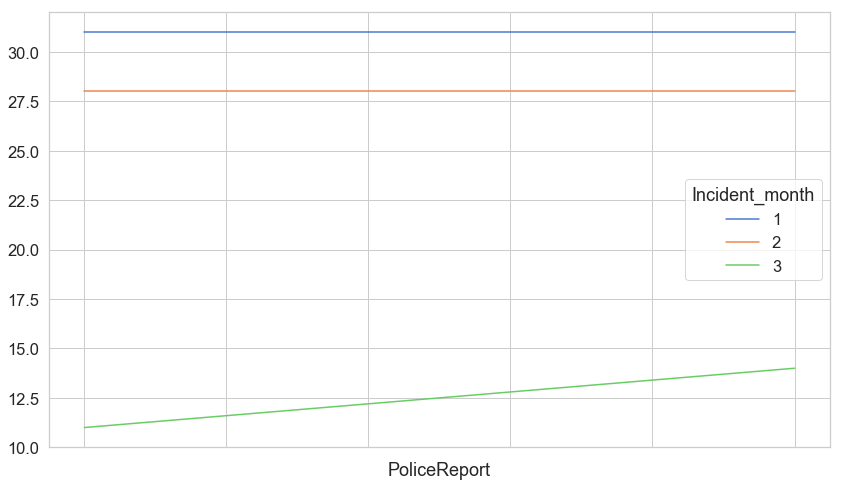

In [346]:
data.pivot_table(index='PoliceReport', columns='Incident_month', values='Incident_day' ,aggfunc=np.max, fill_value = 0).plot()

To verify the time in which major incidents occured 

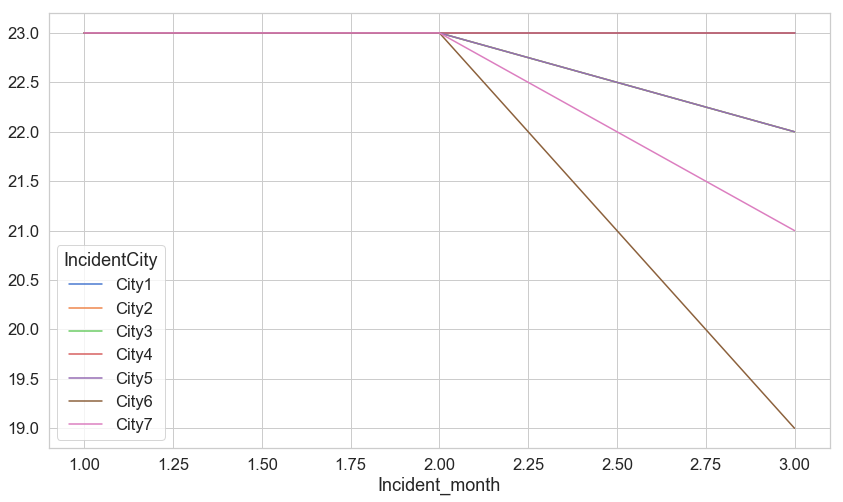

In [347]:
data.pivot_table(index='Incident_month', columns='IncidentCity', values='IncidentTime', aggfunc=np.max, fill_value = 0).plot()

Time slots where major incidents occured 

### HEAT MAP -CORRELATION PLOT

#### To find the Co-relation between the features/variables

In [348]:
import seaborn as sns

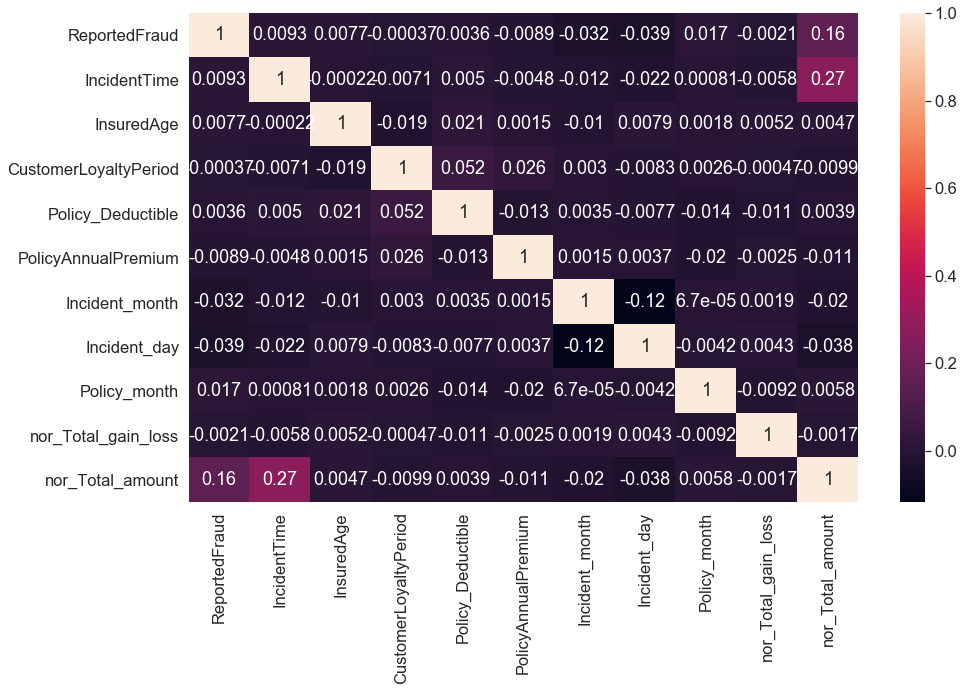

In [349]:
import seaborn as sns

Var_Corr = data.corr()
fig = plt.figure(figsize=(15,9))
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

### INFERENCE: There's a high corelation between Incident time and nor_Total_amount

### CHECKING FOR CLASS IMBALANCE 

 There is no CLASS IMBALANCE 

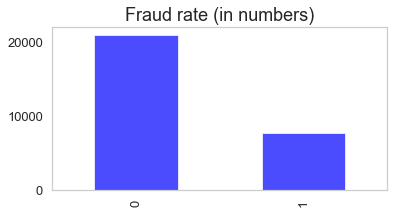

In [350]:
plt.figure()
df_data_comb ['ReportedFraud'].value_counts().plot(kind='bar',
                                  figsize=(6,3),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title('Fraud rate (in numbers)')
plt.grid()
plt.show()

Verfiying how many incidents were police reported as this would help us understand the fraud rate

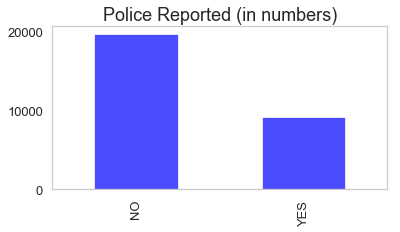

In [351]:
plt.figure()
data_Cat['PoliceReport'].value_counts().plot(kind='bar',
                                  figsize=(6,3),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title('Police Reported (in numbers)')
plt.grid()
plt.show()

Verifying how many incidents resulted in Body Injuries as this is vital while claiming

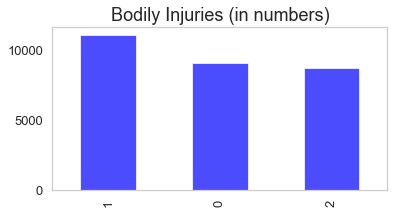

In [352]:
plt.figure()
data['BodilyInjuries'].value_counts().plot(kind='bar',
                                  figsize=(6,3),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title('Bodily Injuries (in numbers)')
plt.grid()
plt.show()

To understand the pattern of incidents/no of incidents occuring per month

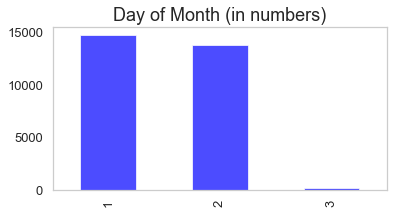

In [353]:
plt.figure()
data['Incident_month'].value_counts().plot(kind='bar',
                                  figsize=(6,3),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title('Day of Month (in numbers)')
plt.grid()
plt.show()

To see which day of the month results in more incidents 

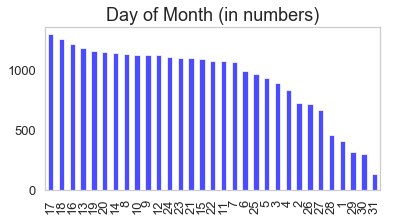

In [354]:
plt.figure()
data_Cat['Incident_day'].value_counts().plot(kind='bar',
                                  figsize=(6,3),
                                  color="blue",
                                  alpha = 0.7,
                                  fontsize=13)
plt.title('Day of Month (in numbers)')
plt.grid()
plt.show()

In [355]:
data.columns

Index(['ReportedFraud', 'TypeOfIncident', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentCity', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'InsuredAge', 'InsuredEducationLevel',
       'InsuredOccupation', 'CustomerLoyaltyPeriod', 'InsurancePolicyState',
       'Policy_Deductible', 'PolicyAnnualPremium', 'VehicleMake',
       'VehicleModel', 'VehicleYOM', 'Incident_month', 'Incident_day',
       'Policy_month', 'nor_Total_gain_loss', 'nor_Total_amount'],
      dtype='object')

### Time of the day of the max incident occurence 

Text(0, 0.5, 'Frequency')

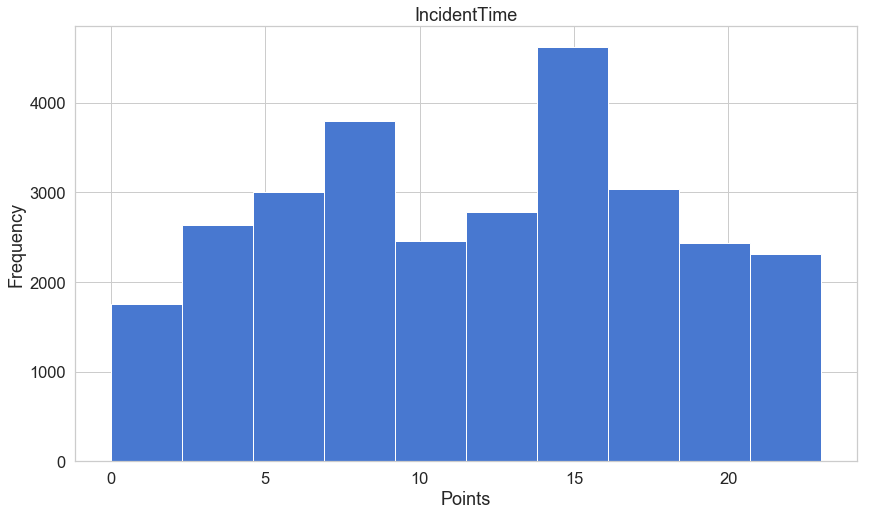

In [356]:

fig, ax = plt.subplots()
# plot histogram
ax.hist(Merged_Train4['IncidentTime'])
# set title and labels
ax.set_title('IncidentTime')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

## Day of the month of maximum incident occurence

Text(0, 0.5, 'No of occurence ')

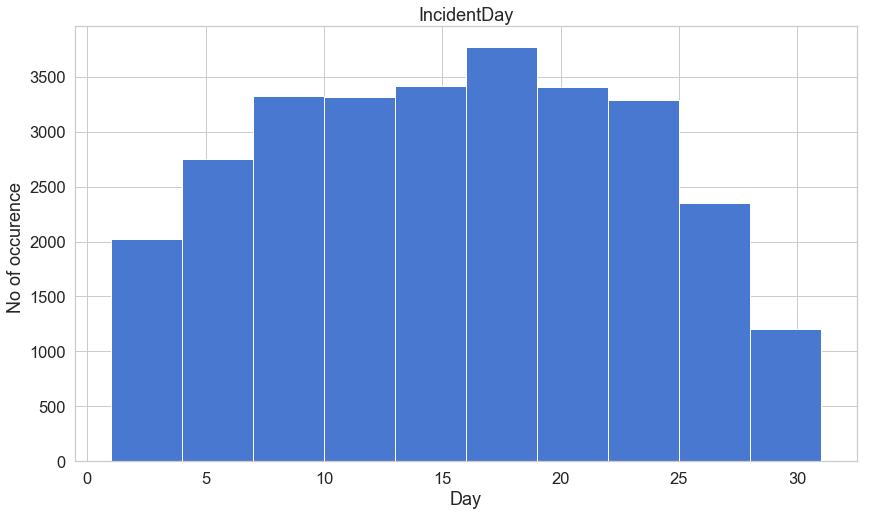

In [357]:

fig, ax = plt.subplots()
# plot histogram
ax.hist(Merged_Train4['Incident_day'])
# set title and labels
ax.set_title('IncidentDay')
ax.set_xlabel('Day')
ax.set_ylabel('No of occurence ')

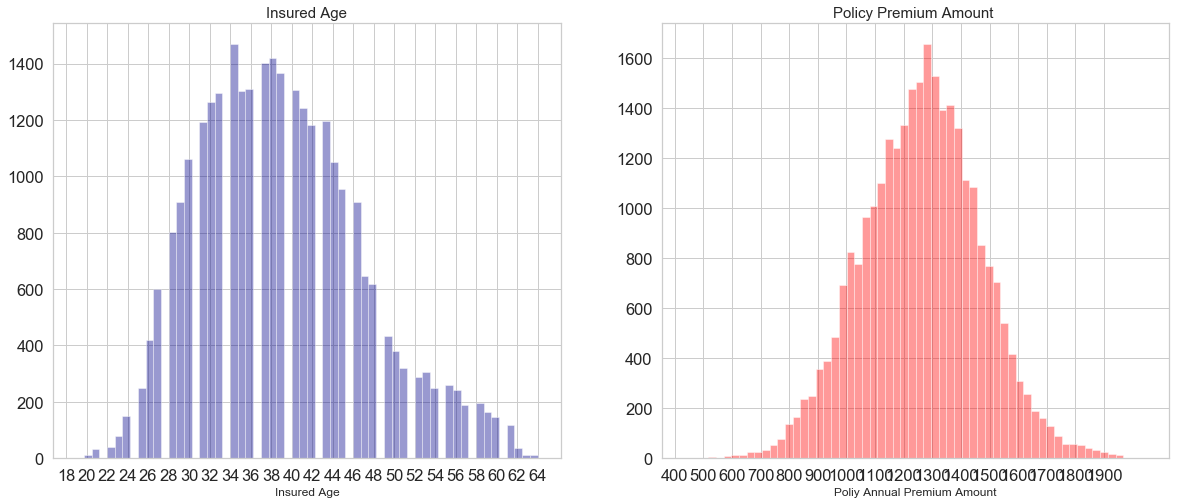

In [358]:
fig,axs=plt.subplots(1,2,figsize=(20,8))
sns.distplot(Merged_Train4['InsuredAge'],bins=60,kde=False,color='darkblue',ax=axs[0])
axs[0].set_xticks(range(18,65,2))
axs[0].set_title("Insured Age", size=15)
axs[0].set_xlabel("Insured Age", size=12)
sns.distplot(Merged_Train4['PolicyAnnualPremium'],bins=60,kde=False,color='red',ax=axs[1])
axs[1].set_xticks(range(400,2000,100))
axs[1].set_title("Policy Premium Amount ", size=15)
axs[1].set_xlabel("Poliy Annual Premium Amount", size=12)
plt.show()

#### SPLITTING OF DATA INTO TRAIN AND TEST

In [390]:
fdf_data_comb.shape

(28836, 68)

In [391]:
fdf_data_test_comb.shape

(8912, 67)

In [392]:
X = fdf_data_comb.drop("ReportedFraud",axis=1)
y = fdf_data_comb["ReportedFraud"]

In [395]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=20, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
 

TRAIN: [ 1402  1405  1406 ... 28833 28834 28835] TEST: [   0    1    2 ... 1571 1576 1582]
TRAIN: [    0     1     2 ... 28833 28834 28835] TEST: [1402 1405 1406 ... 3007 3009 3014]
TRAIN: [    0     1     2 ... 28833 28834 28835] TEST: [2833 2834 2836 ... 4602 4608 4609]
TRAIN: [    0     1     2 ... 28833 28834 28835] TEST: [4235 4236 4237 ... 6002 6005 6012]
TRAIN: [    0     1     2 ... 28833 28834 28835] TEST: [5668 5669 5671 ... 7296 7300 7301]
TRAIN: [    0     1     2 ... 28833 28834 28835] TEST: [7179 7180 7181 ... 8777 8778 8784]
TRAIN: [    0     1     2 ... 28833 28834 28835] TEST: [ 8613  8614  8615 ... 10236 10237 10240]
TRAIN: [    0     1     2 ... 28833 28834 28835] TEST: [10046 10047 10048 ... 11618 11624 11628]
TRAIN: [    0     1     2 ... 28833 28834 28835] TEST: [11516 11517 11518 ... 13195 13198 13200]
TRAIN: [    0     1     2 ... 28833 28834 28835] TEST: [12893 12895 12897 ... 14575 14576 14580]
TRAIN: [    0     1     2 ... 28833 28834 28835] TEST: [14367 1436

In [94]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [396]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27395, 67)
(1441, 67)
(27395,)
(1441,)


In [397]:
X_train.drop(['AuthoritiesContacted'],axis=1,inplace=True)
X_test.drop(['AuthoritiesContacted'],axis=1,inplace=True)
fdf_data_test_comb.drop(['AuthoritiesContacted'],axis=1,inplace=True)


## Model Building

#### Random Forest

In [398]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=0.65,n_jobs = -1,random_state =12)

In [399]:
X_train.columns

Index(['Incident_day', 'NumberOfVehicles', 'BodilyInjuries', 'Incident_month',
       'Policy_month', 'InsuredAge', 'nor_Total_gain_loss',
       'CustomerLoyaltyPeriod', 'IncidentTime', 'nor_Total_amount',
       'Policy_Deductible', 'PolicyAnnualPremium', 'VehicleYOM',
       'InsuredEducationLevel_College', 'InsuredEducationLevel_High School',
       'InsuredEducationLevel_JD', 'InsuredEducationLevel_MD',
       'InsuredEducationLevel_Masters', 'InsuredEducationLevel_PhD',
       'InsuredOccupation_armed-forces', 'InsuredOccupation_craft-repair',
       'InsuredOccupation_exec-managerial',
       'InsuredOccupation_farming-fishing',
       'InsuredOccupation_handlers-cleaners',
       'InsuredOccupation_machine-op-inspct',
       'InsuredOccupation_other-service', 'InsuredOccupation_priv-house-serv',
       'InsuredOccupation_prof-specialty', 'InsuredOccupation_protective-serv',
       'InsuredOccupation_sales', 'InsuredOccupation_tech-support',
       'InsuredOccupation_transport-m

In [400]:
%time rfc.fit(X = X_train,y = y_train)

Wall time: 3.91 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.65, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [401]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [403]:
## Predict
train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class 'N'",f1_score(y_train,train_predictions,pos_label=0))
print("\nTrain data f1-score for class 'Y'",f1_score(y_train,train_predictions,pos_label=1))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class 'N'",f1_score(y_test,test_predictions,pos_label=0))
print("\nTest data f1-score for class 'Y'",f1_score(y_test,test_predictions,pos_label=1))

TRAIN DATA ACCURACY 0.9995619638620186

Train data f1-score for class 'N' 0.9997000749812547

Train data f1-score for class 'Y' 0.9991880920162383


--------------------------------------


TEST DATA ACCURACY 0.8383067314365025

Test data f1-score for class 'N' 0.8945224083295609

Test data f1-score for class 'Y' 0.6537890044576522


In [404]:
test_pred=rfc.predict(fdf_data_test_comb)

In [405]:
pred1 = pd.DataFrame(test_pred, columns=['ReportedFraud']).to_csv('test_predictions_phd_New123.csv')

Randomised search

In [406]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features=0.6, class_weight='balanced_subsample')
 
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"

param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20],
           "class_weight" : ['balanced','balanced_subsample']}
 
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, 
                                 param_distributions = param_grid, 
                                 cv = 3, n_iter=16)

In [407]:
rfc_cv_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight='balanced_subsample',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=0.6,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                  

In [408]:
rfc_cv_grid.best_params_
#rfc_cv_grid.best_estimator_

{'n_estimators': 50,
 'min_samples_leaf': 5,
 'max_depth': 20,
 'class_weight': 'balanced_subsample'}

In [409]:
## Predict
train_predictions = rfc_cv_grid.predict(X_train)
test_predictions = rfc_cv_grid.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class 'N'",f1_score(y_train,train_predictions,pos_label=0))
print("\nTrain data f1-score for class 'Y'",f1_score(y_train,train_predictions,pos_label=1))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class 'N'",f1_score(y_test,test_predictions,pos_label=0))
print("\nTest data f1-score for class 'Y'",f1_score(y_test,test_predictions,pos_label=1))

TRAIN DATA ACCURACY 0.943858368315386

Train data f1-score for class 'N' 0.9613567839195981

Train data f1-score for class 'Y' 0.8973982655103403


--------------------------------------


TEST DATA ACCURACY 0.8306731436502429

Test data f1-score for class 'N' 0.8854460093896712

Test data f1-score for class 'Y' 0.6755319148936171


# Logistic Regression

In [410]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)


In [411]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[903, 149],
       [225, 164]], dtype=int64)

In [412]:
classifier = LogisticRegression(random_state=123)

In [413]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [414]:
# Predictions on train data
train_pred = classifier.predict(X_train)
# Predictions on test data
test_pred = classifier.predict(X_test)

In [415]:
# Train data
confusion_matrix_train = confusion_matrix(y_train, train_pred)
print("Confusion Matrix - Train Data: \n", confusion_matrix_train)
# Test data
confusion_matrix_test= confusion_matrix(y_test, test_pred)
print("Confusion Matrix - Test Data: \n", confusion_matrix_test)

Confusion Matrix - Train Data: 
 [[17456  2543]
 [ 3295  4101]]
Confusion Matrix - Test Data: 
 [[903 149]
 [225 164]]


In [416]:
# Metrics on train data for logistic regression model
#Accuracy
accuracy_Train_logReg = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
#specificity or true negative rate (TNR)
specificity_Train_logReg = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
#sensitivity, recall, hit rate, or true positive rate (TPR)
recall_Train_logReg = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
#precision
precision_Train_logReg = confusion_matrix_train[1,1]/(confusion_matrix_train[0,1]+confusion_matrix_train[1,1])

print("Train Specificity: ",specificity_Train_logReg)
print("Train Recall: ",recall_Train_logReg)
print("Train Precision: ",precision_Train_logReg)
print("Train Accuracy: ",accuracy_Train_logReg)

Train Specificity:  0.8728436421821091
Train Recall:  0.5544889129259059
Train Precision:  0.6172486453943408
Train Accuracy:  0.7868954188720569


In [417]:
# Metrics on test data
#Accuracy
accuracy_Test_logReg = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
#specificity or true negative rate (TNR)
specificity_Test_logReg = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
#sensitivity, recall, hit rate, or true positive rate (TPR)
recall_Test_logReg = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
#precision
precision_Test_logReg = confusion_matrix_test[1,1]/(confusion_matrix_test[0,1]+confusion_matrix_test[1,1])

print("Test Specificity: ",specificity_Test_logReg)
print("Test Recall: ",recall_Test_logReg)
print("Test Precision: ",precision_Test_logReg)
print("Test Accuracy: ",accuracy_Test_logReg)

Test Specificity:  0.8583650190114068
Test Recall:  0.42159383033419023
Test Precision:  0.5239616613418531
Test Accuracy:  0.7404580152671756


In [418]:
print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class 'N'",f1_score(y_train,train_pred,pos_label=0))
print("\nTrain data f1-score for class 'Y'",f1_score(y_train,train_pred,pos_label=1))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class 'N'",f1_score(y_test,test_pred,pos_label=0))
print("\nTest data f1-score for class 'Y'",f1_score(y_test,test_pred,pos_label=1))

TRAIN DATA ACCURACY 0.943858368315386

Train data f1-score for class 'N' 0.8567361963190183

Train data f1-score for class 'Y' 0.5841880341880341


--------------------------------------


TEST DATA ACCURACY 0.8306731436502429

Test data f1-score for class 'N' 0.8284403669724769

Test data f1-score for class 'Y' 0.4672364672364672


# KNN 

In [419]:
model= KNeighborsClassifier(algorithm = 'brute',n_neighbors=9)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [420]:
y_pred = model.predict(X_test)

In [421]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.768910478834143


In [422]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class 'N'",f1_score(y_train,train_predictions,pos_label=0))
print("\nTrain data f1-score for class 'Y'",f1_score(y_train,train_predictions,pos_label=1))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class 'N'",f1_score(y_test,test_predictions,pos_label=0))
print("\nTest data f1-score for class 'Y'",f1_score(y_test,test_predictions,pos_label=1))

TRAIN DATA ACCURACY 0.8144916955648841

Train data f1-score for class 'N' 0.8825514213080656

Train data f1-score for class 'Y' 0.5588541666666667


--------------------------------------


TEST DATA ACCURACY 0.768910478834143

Test data f1-score for class 'N' 0.8542669584245076

Test data f1-score for class 'Y' 0.44221105527638194


# DECISION TREE

In [423]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree


from sklearn.model_selection import GridSearchCV

#import graphviz
#!conda install --yes python-graphviz
#!conda install --yes graphviz

import matplotlib.pyplot as plt

In [424]:

clf=tree.DecisionTreeClassifier(max_depth=3)
clf=clf.fit(X_train,y_train)

In [425]:
np.argsort(clf.feature_importances_)

array([ 0, 33, 34, 35, 36, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 31, 32, 29,  1,  2,
        4,  5,  6,  7, 10, 11, 12, 13, 14, 15, 30, 16, 65, 18, 19, 20, 21,
       22, 23, 28, 27, 17, 24, 25, 26,  9,  3, 48,  8, 37, 39, 38],
      dtype=int64)

In [426]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [427]:
print("TRAIN DATA ACCURACY",accuracy_score(y_train,train_predictions))
print("\nTrain data f1-score for class 'N'",f1_score(y_train,train_pred,pos_label=0))
print("\nTrain data f1-score for class 'Y'",f1_score(y_train,train_pred,pos_label=1))

### Test data accuracy
print("\n\n--------------------------------------\n\n")
print("TEST DATA ACCURACY",accuracy_score(y_test,test_predictions))
print("\nTest data f1-score for class 'N'",f1_score(y_test,test_pred,pos_label=0))
print("\nTest data f1-score for class 'Y'",f1_score(y_test,test_pred,pos_label=1))

TRAIN DATA ACCURACY 0.8144916955648841

Train data f1-score for class 'N' 0.8530204692960559

Train data f1-score for class 'Y' 0.6002715546503733


--------------------------------------


TEST DATA ACCURACY 0.768910478834143

Test data f1-score for class 'N' 0.8228200371057515

Test data f1-score for class 'Y' 0.47382920110192833


In [428]:
print(train_pred[:5])
print(test_pred[:5])

[0 0 1 1 1]
[0 0 1 0 0]


In [429]:
print(confusion_matrix_train)
print(confusion_matrix_test)

[[17456  2543]
 [ 3295  4101]]
[[903 149]
 [225 164]]


In [430]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.8728436421821091
Train TPR:  0.5544889129259059
Train Accuracy:  0.7868954188720569


In [431]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.8583650190114068
Test TPR:  0.42159383033419023
Test Accuracy:  0.7404580152671756


# Autoencoders

In [432]:
fdf_data_comb.drop(['AuthoritiesContacted'],axis=1,inplace=True)


In [434]:
X_train1, X_test1 = train_test_split(fdf_data_comb, test_size=0.4, random_state=123)

In [435]:
X_train1 = X_train1[X_train1.ReportedFraud == 0]
X_train1 = X_train1.drop(['ReportedFraud'], axis=1)

In [436]:
X_train1.shape

(12618, 66)

In [437]:
y_test = X_test1['ReportedFraud']
X_test1 = X_test1.drop(['ReportedFraud'], axis=1)
X_train1 = X_train1.values
X_test1 = X_test1.values


In [438]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
LABELS = ["Normal", "Fraud"]

In [439]:
normal = fdf_data_comb[df_data_comb['ReportedFraud']==0]
Fraud  = fdf_data_comb[df_data_comb['ReportedFraud']==1]

In [440]:
input_dim = X_train.shape[1]
encoding_dim = 300
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)

decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [441]:
nb_epoch = 20
batch_size = 30
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)

history = autoencoder.fit(X_train1, X_train1,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test1, X_test1),
                    verbose=1)
                    

Train on 12618 samples, validate on 11535 samples
Epoch 1/20
12618/12618 [==============================] - 3s 200us/step - loss: 0.6462 - acc: 0.9752 - val_loss: 0.3159 - val_acc: 0.9830
Epoch 2/20
12618/12618 [==============================] - 2s 129us/step - loss: 0.2731 - acc: 0.9841 - val_loss: 0.2761 - val_acc: 0.9831
Epoch 3/20
12618/12618 [==============================] - 2s 128us/step - loss: 0.2343 - acc: 0.9862 - val_loss: 0.2180 - val_acc: 0.9873
Epoch 4/20
12618/12618 [==============================] - 2s 164us/step - loss: 0.2162 - acc: 0.9866 - val_loss: 0.2053 - val_acc: 0.9873
Epoch 5/20
12618/12618 [==============================] - 3s 225us/step - loss: 0.1964 - acc: 0.9895 - val_loss: 0.1901 - val_acc: 0.9899
Epoch 6/20
12618/12618 [==============================] - 3s 217us/step - loss: 0.1901 - acc: 0.9910 - val_loss: 0.1855 - val_acc: 0.9916
Epoch 7/20
12618/12618 [==============================] - 3s 208us/step - loss: 0.1873 - acc: 0.9907 - val_loss: 0.1904 - 

In [442]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

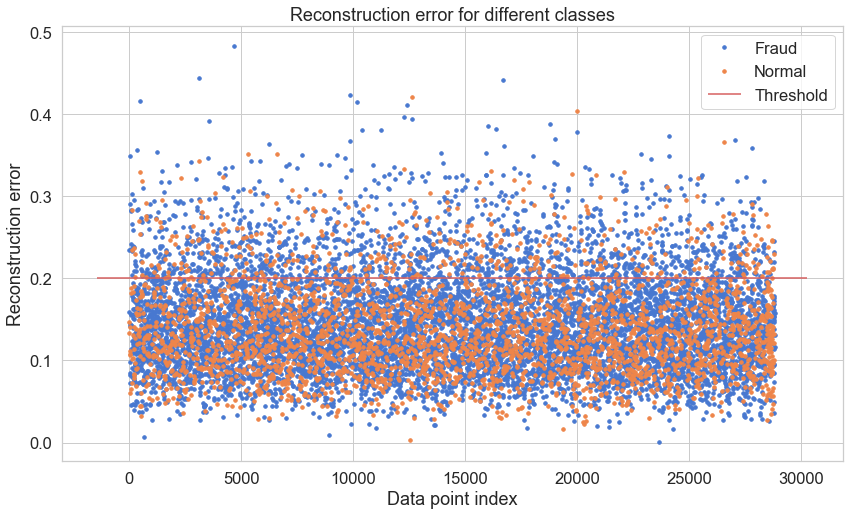

In [443]:
threshold =0.2
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 0 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

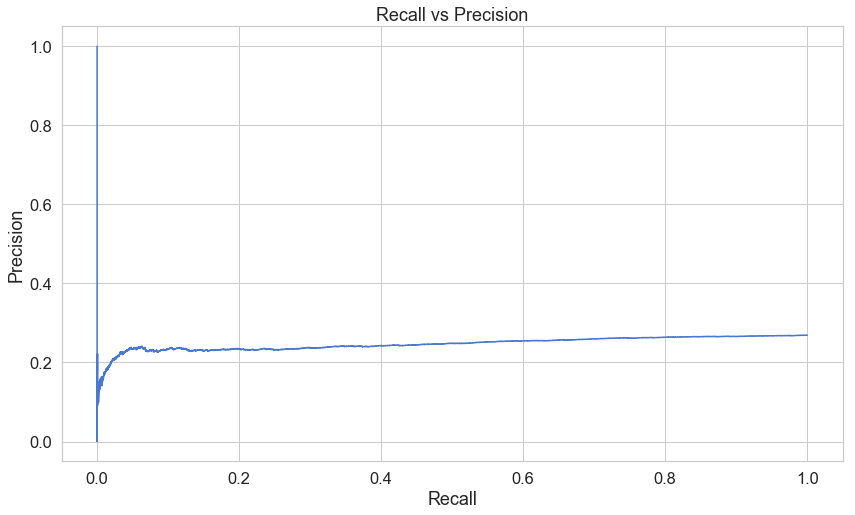

In [444]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

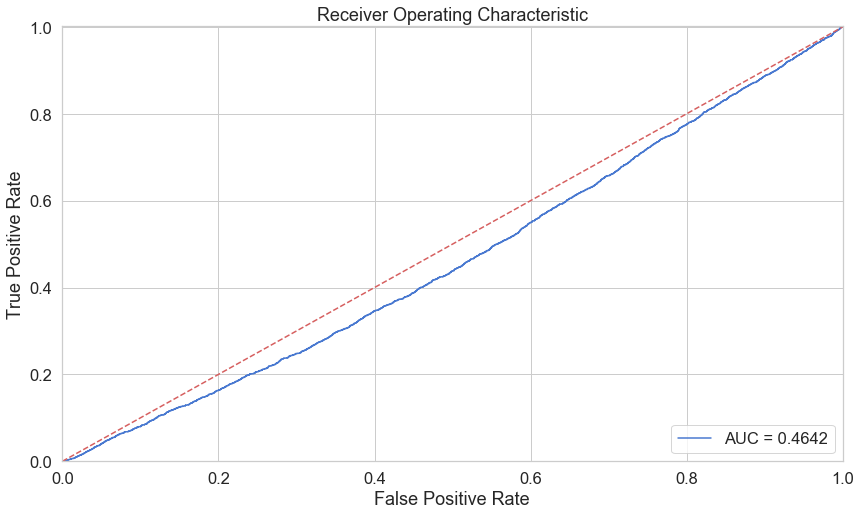

In [445]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [446]:
def mse_for_each_record(act, pred):
    error = np.square(act - pred)
    squared_error = np.square(error)
    mean_squared_error = np.mean(squared_error, axis=1)
    return mean_squared_error

In [447]:
pred_train = autoencoder.predict(X_train1)

mse_train = mse_for_each_record(X_train1, pred_train)

In [448]:
pred_test = autoencoder.predict(X_test1)

mse_test = mse_for_each_record(X_test1, pred_test)

In [449]:
cut_off = np.round(np.percentile(mse_train,45),2)

print("Cut-off = {}".format(cut_off))


Cut-off = 0.26


In [450]:
print("Non-fraud records = {}%".format(np.round(np.sum(mse_train <= cut_off)/X_train1.shape[0],2)*100))
print("fraud records  = {}%".format(np.round(np.sum(mse_test > cut_off)/X_test1.shape[0],2)*100))


Non-fraud records = 46.0%
fraud records  = 53.0%


# Drawing Rules

In [158]:
df_X=pd.DataFrame(X)


In [159]:

X = df_X.drop("AuthoritiesContacted",axis=1)

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [161]:
X, y = make_classification(n_samples=1000,
                           n_features=20,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

In [162]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=250, max_features=0.5,max_depth=40)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [163]:

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 1 (0.307269)
2. feature 0 (0.224217)
3. feature 2 (0.221642)
4. feature 11 (0.020436)
5. feature 19 (0.018113)
6. feature 15 (0.016153)
7. feature 5 (0.015205)
8. feature 7 (0.014751)
9. feature 13 (0.014740)
10. feature 12 (0.014652)
11. feature 8 (0.014492)
12. feature 10 (0.014322)
13. feature 17 (0.013969)
14. feature 9 (0.013964)
15. feature 16 (0.013136)
16. feature 14 (0.012742)
17. feature 6 (0.012684)
18. feature 18 (0.012664)
19. feature 4 (0.012661)
20. feature 3 (0.012191)


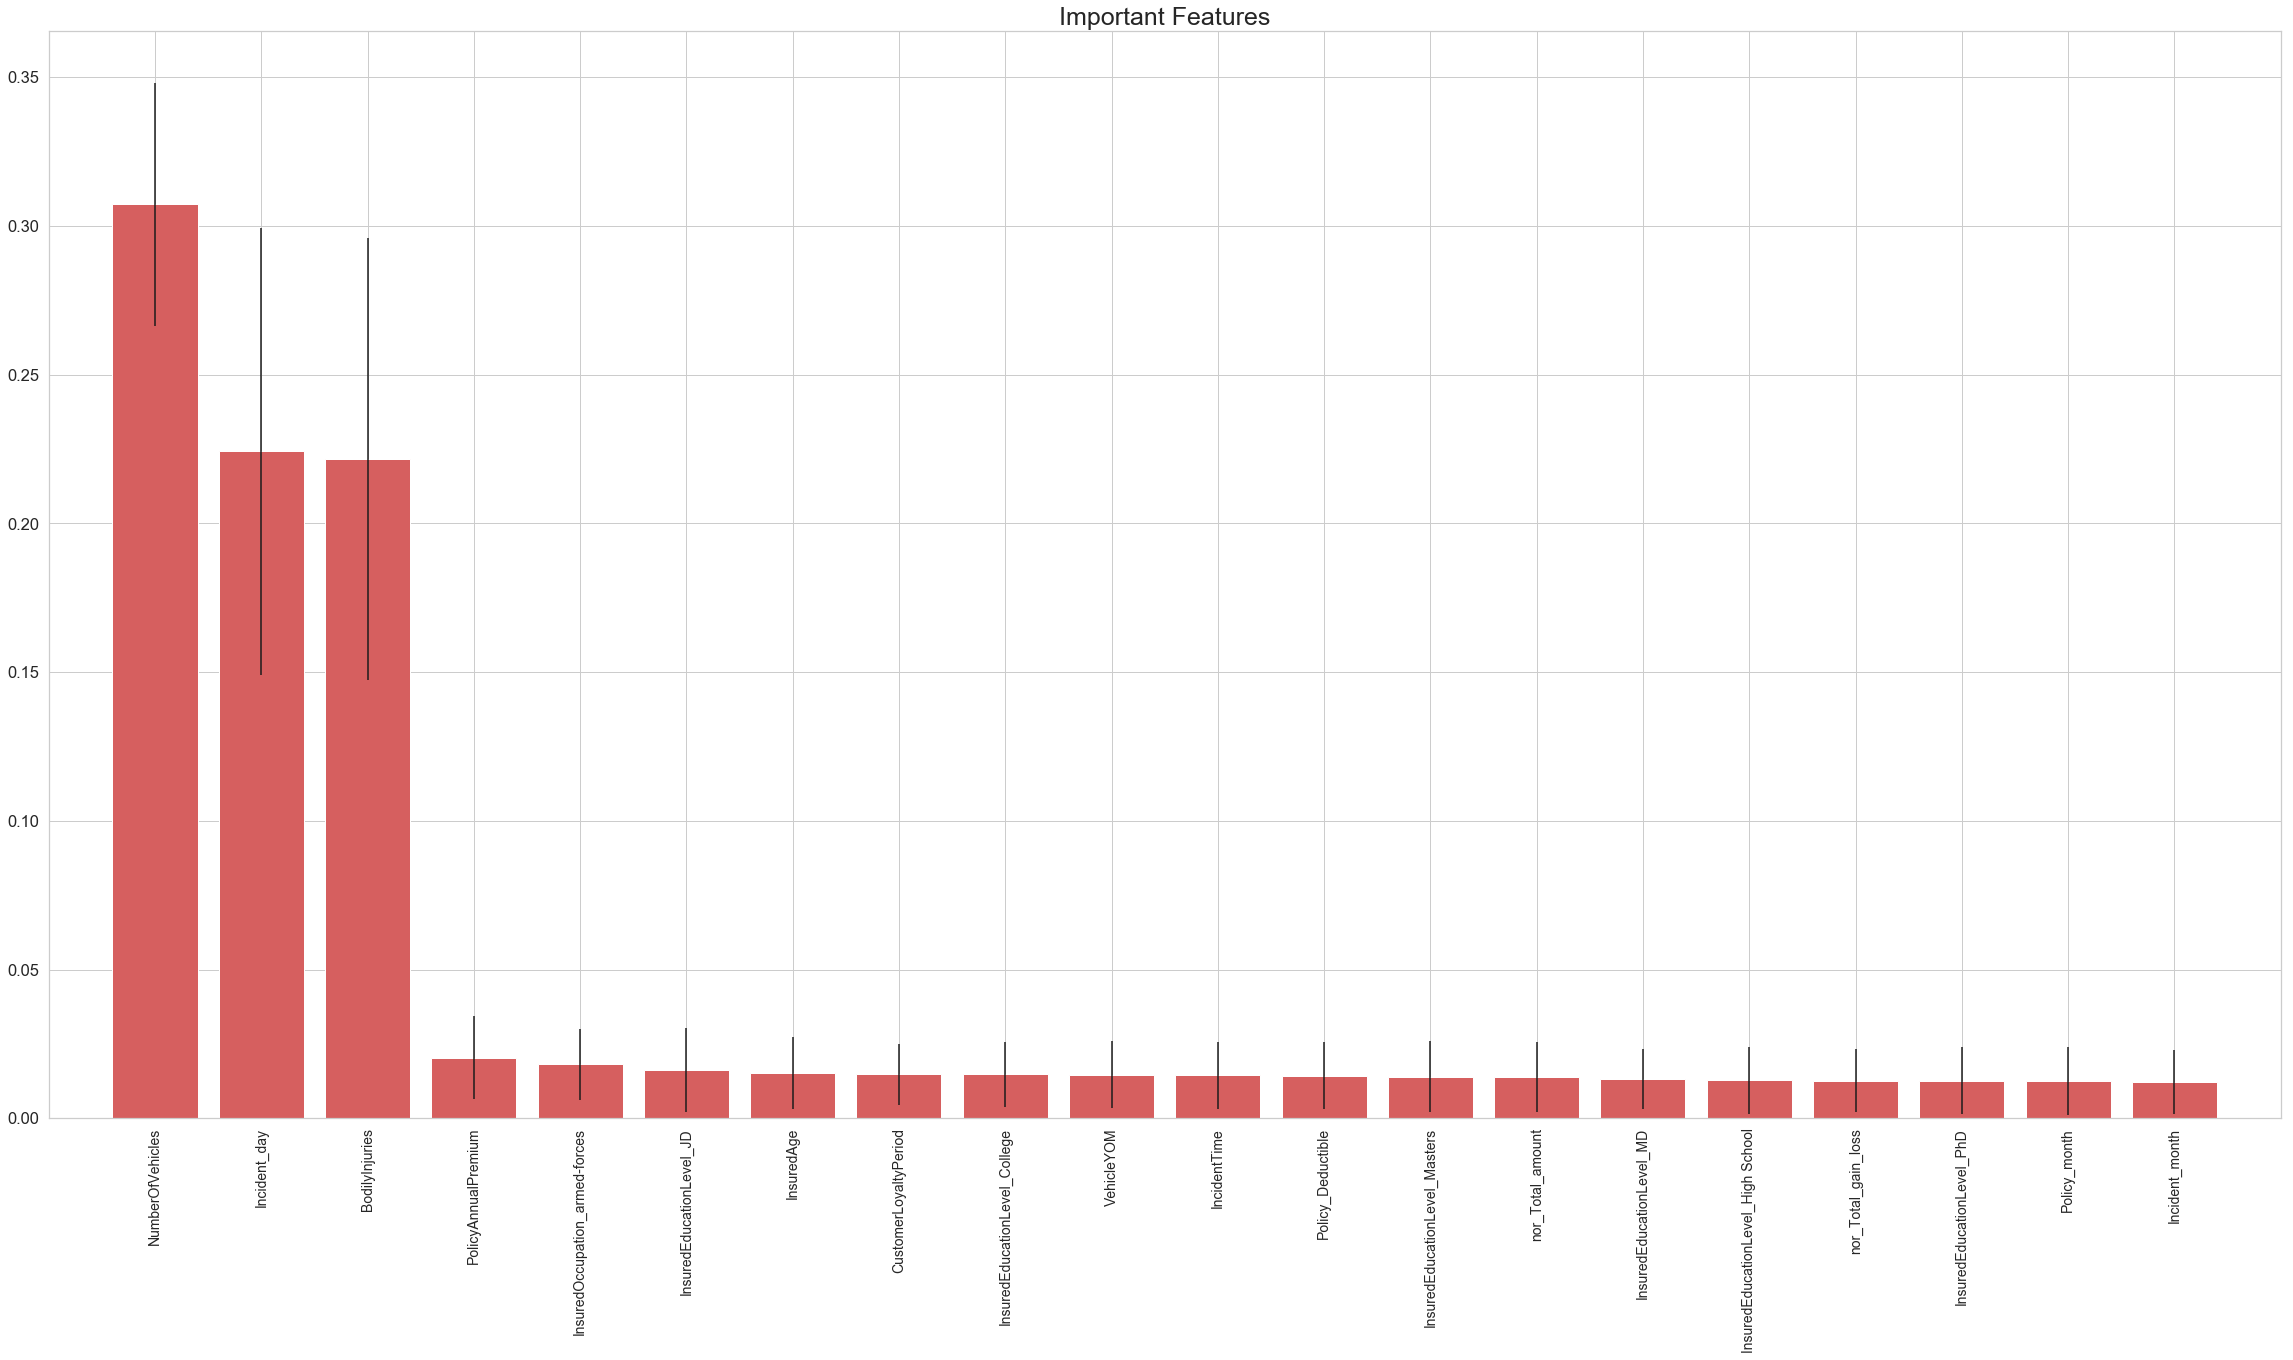

In [164]:
print("Feature ranking:")

for f in range(len(indices)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(40,20))
plt.title("Important Features",size=25)
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), X_train.columns[indices], rotation=90, size=14)
plt.xlim([-1, len(indices)])
plt.show()

In [165]:
!pip3 install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\hp\anaconda3\lib\site-packages (0.21.3)


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [166]:
import sklearn


[0]	validation_0-error:0.396325
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.396325
[2]	validation_0-error:0.39095
[3]	validation_0-error:0.393551
[4]	validation_0-error:0.38835
[5]	validation_0-error:0.38835
[6]	validation_0-error:0.383322
[7]	validation_0-error:0.380374
[8]	validation_0-error:0.381761
[9]	validation_0-error:0.377947


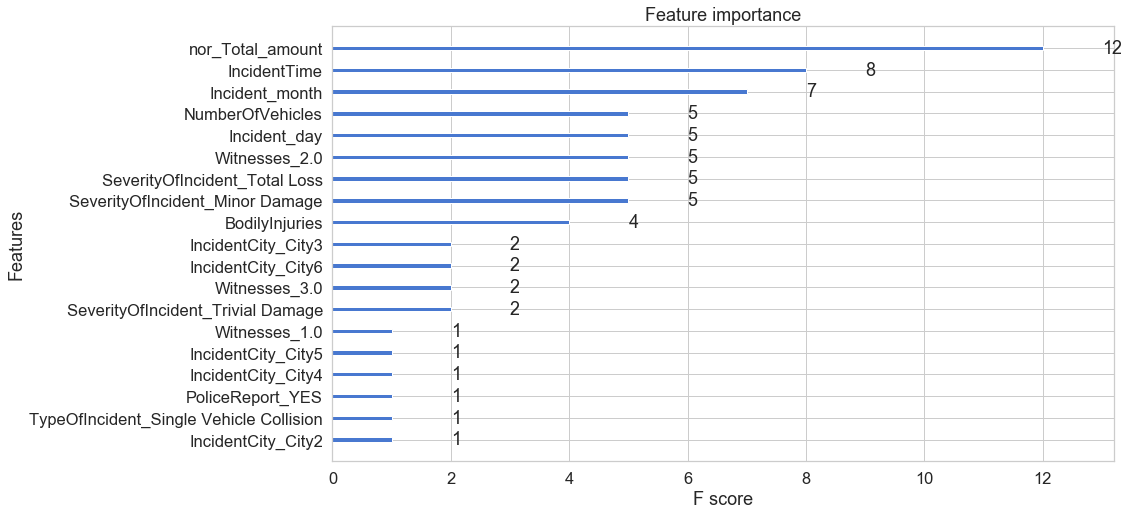

In [167]:

from xgboost import plot_importance,XGBClassifier
model=XGBClassifier(n_estimators=10,learning_rate=0.5)
model.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)])
plot_importance(model)
plt.show()